In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/LOBster'

os.chdir(path)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Read the data
df = pd.read_csv('MSFT/data_msft_ta.csv')
data = df['Price']
data.dropna(inplace=True)
dataset = data.values

training_data_len = math.ceil(len(dataset) * 0.8)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, :1])  # Use only 'Price' as input feature
    y_train.append(train_data[i, 0])  # Use the 1st column (Price) as the target

x_train, y_train = np.array(x_train), np.array(y_train)

model = Sequential()
model.add(LSTM(units=96, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(layers.Dropout(0.2))
model.add(LSTM(units=164, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(LSTM(units=184, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss, metrics=['mape', tf.keras.metrics.RootMeanSquaredError()])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with EarlyStopping callback
model.fit(x_train, y_train, batch_size=64, epochs=100, callbacks=[early_stopping], validation_split=0.2)

x_test = []
y_test = []

for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, :1])  # Use only 'Price' as input feature
    y_test.append(test_data[i, 0])  # Use the 1st column (Price) as the target

x_test = np.array(x_test)

predictions = model.predict(x_test)

# Inverse transform the predictions and y_test
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

# Plot the predicted and actual prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[:training_data_len], data['Price'].values[:training_data_len], label='Training', color='blue')
plt.plot(data.index[training_data_len + 10:], data['Price'].values[training_data_len + 10:], label='Actual', color='orange')
plt.plot(data.index[training_data_len + 10:], predictions, label='Predicted', color='green')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Training, Actual, and Predicted Stock Prices')
plt.legend()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
mape = np.mean(np.abs((y_test - predictions) / y_test))

print("RMSE:", rmse)
print("MAPE:", mape)


Epoch 1/100
273/273 [==============================] - 38s 124ms/step - loss: 0.1691 - mape: 74.9688 - root_mean_squared_error: 0.4112 - val_loss: 0.0952 - val_mape: 93.4428 - val_root_mean_squared_error: 0.3085
Epoch 2/100
273/273 [==============================] - 29s 108ms/step - loss: 0.1151 - mape: 65.0657 - root_mean_squared_error: 0.3392 - val_loss: 0.0766 - val_mape: 76.8720 - val_root_mean_squared_error: 0.2768
Epoch 3/100
273/273 [==============================] - 29s 105ms/step - loss: 0.1093 - mape: 63.5283 - root_mean_squared_error: 0.3306 - val_loss: 0.0694 - val_mape: 70.2510 - val_root_mean_squared_error: 0.2635
Epoch 4/100
273/273 [==============================] - 29s 104ms/step - loss: 0.1060 - mape: 61.0360 - root_mean_squared_error: 0.3256 - val_loss: 0.0686 - val_mape: 72.3945 - val_root_mean_squared_error: 0.2620
Epoch 5/100
273/273 [==============================] - 30s 108ms/step - loss: 0.1026 - mape: 61.4017 - root_mean_squared_error: 0.3204 - val_loss: 0.067

KeyError: ignored

<Figure size 1200x600 with 0 Axes>

KeyError: ignored

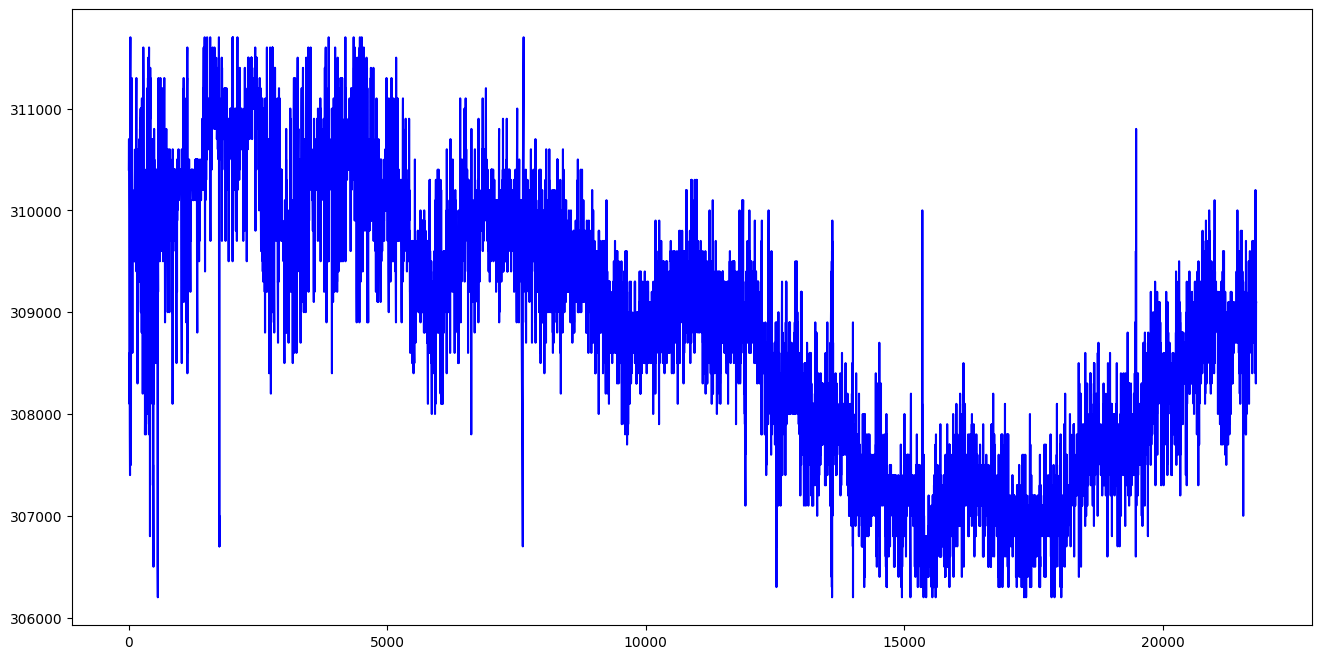

In [ ]:
# Plot the training, actual, and predicted values
plt.figure(figsize=(16,8))
plt.plot(data.index[:training_data_len], data.values[:training_data_len], label='Training', color='blue')
plt.plot(data.index[training_data_len + 10:], data['Price'].values[training_data_len + 10:], label='Actual', color='orange')
plt.plot(data.index[training_data_len + 10:], predictions, label='Predicted', color='green')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Training, Actual, and Predicted Stock Prices')
plt.legend()
plt.show()

In [ ]:
# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
mape = np.mean(np.abs((y_test - predictions) / y_test))

print("RMSE:", rmse)
print("MAPE:", mape)

In [ ]:
print(y_test)
print(predictions)